# First Neural Network
### Working on MNIST Dataset

In [85]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

In [63]:
mnist = tf.keras.datasets.mnist

In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

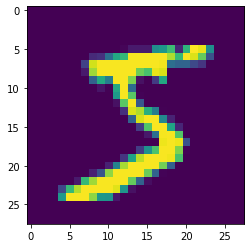

In [65]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

In [66]:
x_train, x_test = x_train/255.0, x_test/255.0

In [67]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

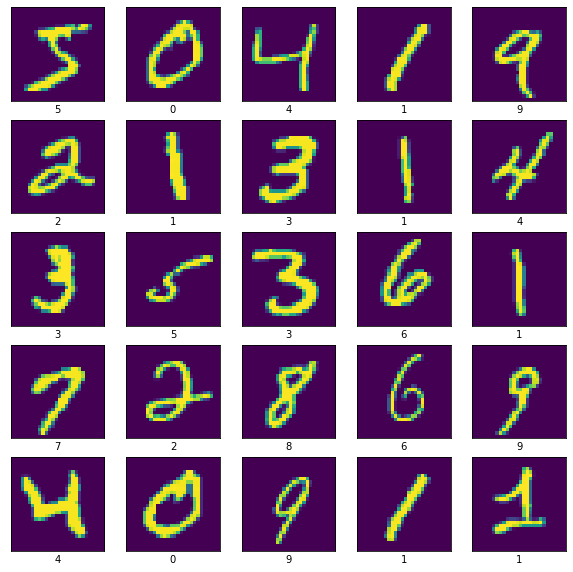

In [68]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [70]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.07315609, -0.13333105, -0.28693044,  0.5138347 , -0.2574746 ,
         0.22049947,  0.49513495, -0.14076756,  0.03906675,  0.03995146]],
      dtype=float32)

In [72]:
tf.nn.softmax(predictions).numpy()

array([[0.08577008, 0.08076109, 0.06926197, 0.15426333, 0.07133248,
        0.11504529, 0.15140545, 0.08016273, 0.09595633, 0.09604125]],
      dtype=float32)

In [73]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [74]:
loss_fn(y_train[:1], predictions).numpy()

2.1624293

In [75]:
model.compile(
    loss=loss_fn,
    optimizer='adam',
    metrics=['accuracy'],
)

In [76]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4931 - accuracy: 0.8548
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1511 - accuracy: 0.9550
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9762


In [77]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9786


[0.07372882217168808, 0.978600025177002]

In [78]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax(),
])

In [79]:
predictions = probability_model.predict(x_test)

In [80]:
print(predictions[0])
print(np.argmax(predictions[0]))

[3.7708341e-07 4.0531409e-09 9.4789633e-05 1.7480191e-03 1.2056982e-10
 4.5509933e-07 4.9441890e-13 9.9811989e-01 2.2279869e-06 3.4122902e-05]
7


In [81]:
y_test[0]

7

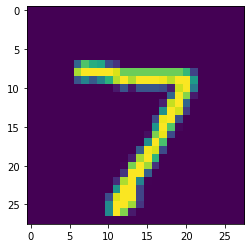

In [82]:
plt.figure()
plt.imshow(x_test[0])
plt.show()

### Looks like the model predicted correct value

tf.Tensor(
[3.7708270e-07 4.0531334e-09 9.4789546e-05 1.7480175e-03 1.2056960e-10
 4.5509933e-07 4.9441890e-13 9.9811989e-01 2.2279846e-06 3.4122870e-05], shape=(10,), dtype=float32)
7
7


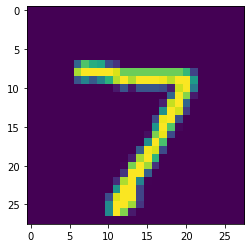

In [83]:
# Another way
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])
plt.figure()
plt.imshow(x_test[0])
plt.show()